In [1]:
import sys
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

sys.path.append('..')

from Ass1.data import load_mnist

In [2]:
class MNIST(Dataset):
    def __init__(self, x, y):
        self.train, self.label = torch.tensor(x).to('cuda')/255, torch.tensor(y).to('cuda')
    
    def __len__(self):
        return len(self.train)

    def __getitem__(self, index):
        return self.train[index], self.label[index]

## Question 11

In [3]:
(xtrain, xlabel), (xval, yval), _ = load_mnist(final=False, flatten=True)
train_loader = DataLoader(MNIST(xtrain, xlabel), batch_size=32, shuffle=True)
xval, yval = torch.tensor(xval).to('cuda')/255, torch.tensor(yval).to('cuda')

In [4]:
model = nn.Sequential(
    nn.Linear(784, 4096),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(4096, 1024),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(1024, 128),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Dropout(p=0.3),
    nn.LogSoftmax(dim=1)
).to('cuda')

opt = SGD([p for p in model.parameters() if p.requires_grad], lr=1e-3, momentum=0.9, weight_decay=1e-4)

model

Sequential(
  (0): Linear(in_features=784, out_features=4096, bias=True)
  (1): Dropout(p=0.3, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=4096, out_features=1024, bias=True)
  (4): Dropout(p=0.3, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=128, bias=True)
  (7): Dropout(p=0.3, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
  (10): Dropout(p=0.3, inplace=False)
  (11): LogSoftmax(dim=1)
)

In [5]:
EPOCH = 20
criterion = nn.NLLLoss()

def evaluate(model, e=EPOCH):
    model.eval()
    out = model(xval).detach()
    loss = criterion(out, yval).detach()
    acc = float((yval == out.argmax(dim=1)).to(float).mean())

    print(f"\n-------------EPOCH {e}-------------")
    print(f"Validation accuracy: {acc:.4f}\tLoss: {loss:.4f}")

    return {e: {'loss': loss, 'acc': acc}}

def train(model):
    model.train()
    for x, y in tqdm(train_loader):
        opt.zero_grad()
        loss = criterion(model(x), y)
        loss.backward()
        opt.step()

In [6]:
results = list()
for e in range(EPOCH):
    results.append(evaluate(model, e=e))
    train(model)
results.append(evaluate(model))


-------------EPOCH 0-------------
Validation accuracy: 0.1272	Loss: 2.3044


100%|██████████| 1719/1719 [00:05<00:00, 299.65it/s]



-------------EPOCH 1-------------
Validation accuracy: 0.9026	Loss: 0.5005


100%|██████████| 1719/1719 [00:05<00:00, 302.47it/s]



-------------EPOCH 2-------------
Validation accuracy: 0.9298	Loss: 0.2756


100%|██████████| 1719/1719 [00:05<00:00, 296.21it/s]



-------------EPOCH 3-------------
Validation accuracy: 0.9456	Loss: 0.2085


100%|██████████| 1719/1719 [00:05<00:00, 304.07it/s]



-------------EPOCH 4-------------
Validation accuracy: 0.9534	Loss: 0.1673


100%|██████████| 1719/1719 [00:05<00:00, 302.93it/s]



-------------EPOCH 5-------------
Validation accuracy: 0.9620	Loss: 0.1460


100%|██████████| 1719/1719 [00:05<00:00, 303.18it/s]



-------------EPOCH 6-------------
Validation accuracy: 0.9678	Loss: 0.1234


100%|██████████| 1719/1719 [00:05<00:00, 301.96it/s]



-------------EPOCH 7-------------
Validation accuracy: 0.9700	Loss: 0.1108


100%|██████████| 1719/1719 [00:05<00:00, 303.01it/s]



-------------EPOCH 8-------------
Validation accuracy: 0.9724	Loss: 0.0979


100%|██████████| 1719/1719 [00:05<00:00, 301.81it/s]



-------------EPOCH 9-------------
Validation accuracy: 0.9722	Loss: 0.0934


100%|██████████| 1719/1719 [00:05<00:00, 303.00it/s]



-------------EPOCH 10-------------
Validation accuracy: 0.9750	Loss: 0.0880


100%|██████████| 1719/1719 [00:05<00:00, 301.26it/s]



-------------EPOCH 11-------------
Validation accuracy: 0.9774	Loss: 0.0798


100%|██████████| 1719/1719 [00:05<00:00, 301.93it/s]



-------------EPOCH 12-------------
Validation accuracy: 0.9792	Loss: 0.0772


100%|██████████| 1719/1719 [00:05<00:00, 301.82it/s]



-------------EPOCH 13-------------
Validation accuracy: 0.9782	Loss: 0.0739


100%|██████████| 1719/1719 [00:05<00:00, 299.81it/s]



-------------EPOCH 14-------------
Validation accuracy: 0.9794	Loss: 0.0741


100%|██████████| 1719/1719 [00:05<00:00, 302.19it/s]



-------------EPOCH 15-------------
Validation accuracy: 0.9800	Loss: 0.0714


100%|██████████| 1719/1719 [00:05<00:00, 302.94it/s]



-------------EPOCH 16-------------
Validation accuracy: 0.9810	Loss: 0.0646


100%|██████████| 1719/1719 [00:05<00:00, 303.49it/s]



-------------EPOCH 17-------------
Validation accuracy: 0.9820	Loss: 0.0667


100%|██████████| 1719/1719 [00:05<00:00, 301.95it/s]



-------------EPOCH 18-------------
Validation accuracy: 0.9810	Loss: 0.0643


100%|██████████| 1719/1719 [00:05<00:00, 299.70it/s]



-------------EPOCH 19-------------
Validation accuracy: 0.9810	Loss: 0.0625


100%|██████████| 1719/1719 [00:05<00:00, 301.06it/s]



-------------EPOCH 20-------------
Validation accuracy: 0.9826	Loss: 0.0615


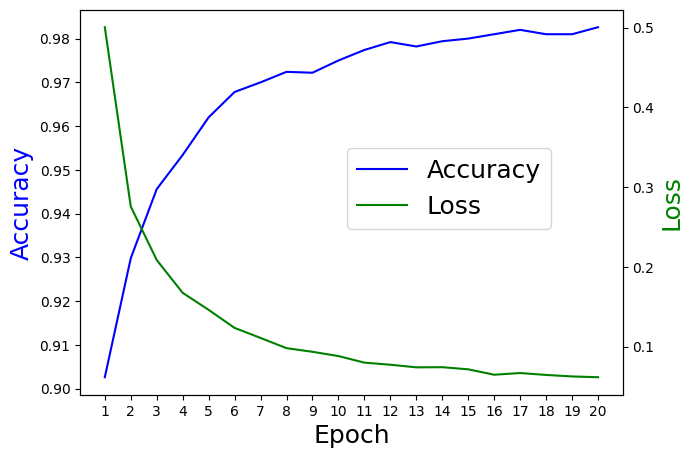

In [7]:
fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.plot(range(1, EPOCH + 1), [float(next(iter(r.values()))['acc']) for r in results][1:], label='Accuracy', c='blue')
ax1.set_ylabel("Accuracy", c='blue', fontsize=18)
ax1.set_xlabel("Epoch", fontsize=18)

ax2 = ax1.twinx()
ax2.plot(range(1, EPOCH + 1), [float(next(iter(r.values()))['loss']) for r in results][1:], label='Loss', c='green')
ax2.set_ylabel("Loss", c='green', fontsize=18)

plt.xticks(range(1, EPOCH + 1))
fig.legend(loc=(0.5, 0.5), fontsize=18)
plt.savefig("images/torch1.png")
plt.show()

## Question 12

In [8]:
(xtrain, xlabel), (xval, yval), _ = load_mnist(final=False, flatten=False)
train_loader = DataLoader(MNIST(xtrain.reshape(-1, 1, 28, 28), xlabel), batch_size=32, shuffle=True)
xval, yval = torch.tensor(xval).to('cuda').reshape(-1, 1, 28, 28)/255, torch.tensor(yval).to('cuda')

In [9]:
model = nn.Sequential(
    nn.BatchNorm2d(1),
    nn.Conv2d(1, 32, 3, padding=1),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, padding=1),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, padding=1),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(1152, 256),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Dropout(p=0.3),
    nn.LogSoftmax(dim=1)
).to('cuda')

opt = Adam([p for p in model.parameters() if p.requires_grad], lr=1e-4, weight_decay=1e-4)

model

Sequential(
  (0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=1152, out_features=256, bias=True)
  (9): Dropout(p=0.3, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=64, bias=True)
  (12): Dropout(p=0.3, inplace=False)
  (13): ReLU()
  (14): Linear(in_features=64, out_features=10, bias=True)
  (15): Dropout(p=0.3, inplace=False)
  (16): LogSoftmax(dim=1)
)

In [10]:
results = list()
for e in range(EPOCH):
    results.append(evaluate(model, e=e))
    train(model)
results.append(evaluate(model))


-------------EPOCH 0-------------
Validation accuracy: 0.1126	Loss: 2.3026


100%|██████████| 1719/1719 [00:06<00:00, 270.05it/s]



-------------EPOCH 1-------------
Validation accuracy: 0.9792	Loss: 0.0734


100%|██████████| 1719/1719 [00:05<00:00, 303.06it/s]



-------------EPOCH 2-------------
Validation accuracy: 0.9820	Loss: 0.0567


100%|██████████| 1719/1719 [00:06<00:00, 270.03it/s]



-------------EPOCH 3-------------
Validation accuracy: 0.9858	Loss: 0.0489


100%|██████████| 1719/1719 [00:05<00:00, 290.00it/s]



-------------EPOCH 4-------------
Validation accuracy: 0.9888	Loss: 0.0378


100%|██████████| 1719/1719 [00:06<00:00, 263.48it/s]



-------------EPOCH 5-------------
Validation accuracy: 0.9892	Loss: 0.0401


100%|██████████| 1719/1719 [00:06<00:00, 268.92it/s]



-------------EPOCH 6-------------
Validation accuracy: 0.9912	Loss: 0.0360


100%|██████████| 1719/1719 [00:06<00:00, 251.93it/s]



-------------EPOCH 7-------------
Validation accuracy: 0.9916	Loss: 0.0347


100%|██████████| 1719/1719 [00:06<00:00, 253.49it/s]



-------------EPOCH 8-------------
Validation accuracy: 0.9910	Loss: 0.0341


100%|██████████| 1719/1719 [00:06<00:00, 259.35it/s]



-------------EPOCH 9-------------
Validation accuracy: 0.9920	Loss: 0.0301


100%|██████████| 1719/1719 [00:06<00:00, 271.87it/s]



-------------EPOCH 10-------------
Validation accuracy: 0.9928	Loss: 0.0360


100%|██████████| 1719/1719 [00:06<00:00, 266.34it/s]



-------------EPOCH 11-------------
Validation accuracy: 0.9910	Loss: 0.0396


100%|██████████| 1719/1719 [00:06<00:00, 262.19it/s]



-------------EPOCH 12-------------
Validation accuracy: 0.9924	Loss: 0.0382


100%|██████████| 1719/1719 [00:06<00:00, 256.91it/s]



-------------EPOCH 13-------------
Validation accuracy: 0.9922	Loss: 0.0411


100%|██████████| 1719/1719 [00:06<00:00, 264.44it/s]



-------------EPOCH 14-------------
Validation accuracy: 0.9934	Loss: 0.0333


100%|██████████| 1719/1719 [00:06<00:00, 272.65it/s]



-------------EPOCH 15-------------
Validation accuracy: 0.9922	Loss: 0.0365


100%|██████████| 1719/1719 [00:06<00:00, 255.39it/s]



-------------EPOCH 16-------------
Validation accuracy: 0.9928	Loss: 0.0352


100%|██████████| 1719/1719 [00:06<00:00, 246.91it/s]



-------------EPOCH 17-------------
Validation accuracy: 0.9926	Loss: 0.0335


100%|██████████| 1719/1719 [00:06<00:00, 261.62it/s]



-------------EPOCH 18-------------
Validation accuracy: 0.9932	Loss: 0.0353


100%|██████████| 1719/1719 [00:06<00:00, 248.76it/s]



-------------EPOCH 19-------------
Validation accuracy: 0.9934	Loss: 0.0333


100%|██████████| 1719/1719 [00:06<00:00, 265.35it/s]



-------------EPOCH 20-------------
Validation accuracy: 0.9936	Loss: 0.0340


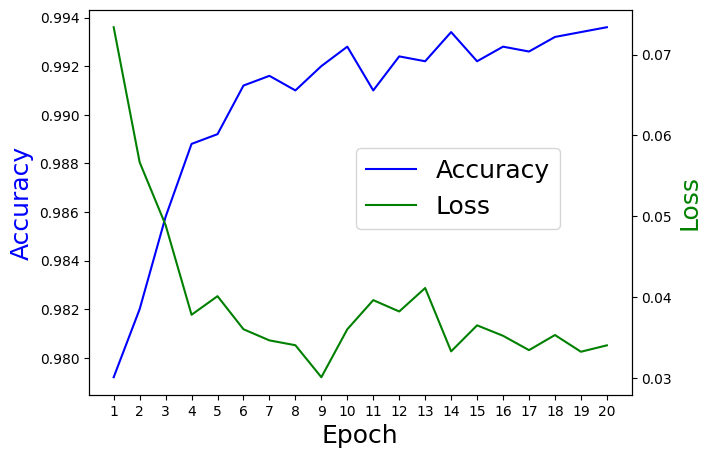

In [11]:
fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.plot(range(1, EPOCH + 1), [float(next(iter(r.values()))['acc']) for r in results][1:], label='Accuracy', c='blue')
ax1.set_ylabel("Accuracy", c='blue', fontsize=18)
ax1.set_xlabel("Epoch", fontsize=18)

ax2 = ax1.twinx()
ax2.plot(range(1, EPOCH + 1), [float(next(iter(r.values()))['loss']) for r in results][1:], label='Loss', c='green')
ax2.set_ylabel("Loss", c='green', fontsize=18)

plt.xticks(range(1, EPOCH + 1))
fig.legend(loc=(0.5, 0.5), fontsize=18)
plt.savefig("images/torch2.png")
plt.show()